In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype("float")
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt2(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)):
        colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)):
        sizes=[(1,1,1)]*len(positions)
        
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s) )
    return Poly3DCollection(np.concatenate(g), facecolors=np.repeat(colors,6), **kwargs)

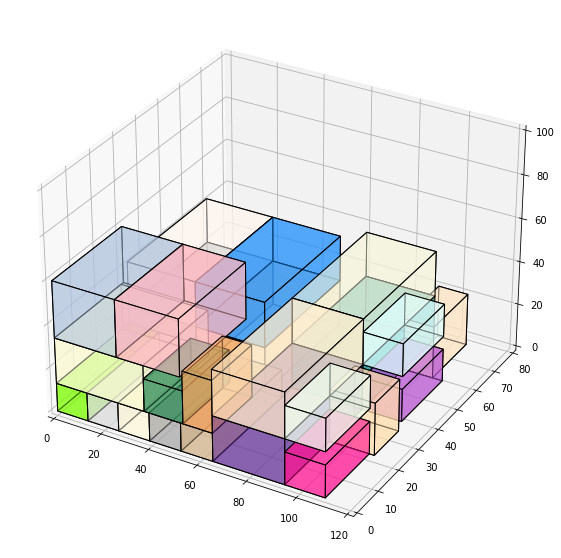

In [4]:
all_colors = [k for k,v in pltc.cnames.items()]

file = pd.read_csv("results.csv")

positions = []
sizes = []

for _, line in file.iterrows():
    # print(line)
    positions.append((line['X'], line['Y'], line['Z']))
    sizes.append((line['SizeX'], line['SizeY'], line['SizeZ']))
    

colors = random.sample(all_colors, len(positions))

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.add_collection3d(plotCubeAt2(positions, sizes, colors=colors, edgecolor="k", alpha=0.5))    

ax.set_xlim([0,120])
ax.set_ylim([0,80])
ax.set_zlim([0,100])

plt.show()